In [1]:
import pandas as pd
from pathlib import Path
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import math
import pandas as pd
#change default plot size
plt.rcParams['figure.figsize']=[30,20]
#change default font size
plt.rcParams.update({'font.size': 15})

infilefl = Path("/home/ikurtz/Desktop/outputs/currvstime_mn138_2.csv")
df = pd.read_csv(infilefl)

#extract avg currents from FL data

avgs = []

with open(infilefl) as f1:

    lines1 = f1.readlines()
    
    x1 = [float((line.split()[0])[:-1])/3600 for line in lines1] #first column is x var for hv data
        
    #the number of plots to be made is the number of columns minus 1 because the first column is the x var
    numplots = (len(lines1[0].split())-1)

    for col in range(numplots):

        y1 = [float(line.split()[col+1][:-1]) for line in lines1] #each column is y var
             
        avgs.append("{:.2f}".format(sum(y1)/len(y1)-5))
        
infilemn = Path("~/Downloads/all_mn_pro5_and_pro6_currents.csv")
df = pd.read_csv(infilemn)
# Let's just have a look at a single panel
df_test = df[df["number"]==138]
df_test = df_test.sort_values(by=['position'])
df_test = df_test[["position","current_left", "current_right"]] #timestamp is seconds since the unix epoch
#print(df_test.shape)
#print(df_test.to_string())

In [2]:
#for positions with more than one value, keep only the last
df_test.drop_duplicates('position', keep='last', inplace=True)
#if a current column only contains NaN, remove it
df_test = df_test.dropna(axis=1, how='all')

df_test.reset_index(drop=True, inplace=True)
#print(df_test.shape)
#print(df_test.to_string())

mncurr = df_test['current_left'].tolist()
#convert units to nA from uA
for val in range(len(mncurr)):
    mncurr[val] = mncurr[val] * 1000
#add n and n+1 values
mncurr2 = []
for val in range(0,len(mncurr)-1,2):
    mncurr2.append(mncurr[val] + mncurr[val+1])
for val in range(len(mncurr2)):
    mncurr2[val] = "{:.3f}".format(mncurr2[val])
#print(mncurr2)

for i in range(len(avgs)):
    avgs[i] = float(avgs[i])
for i in range(len(mncurr2)):
    mncurr2[i] = float(mncurr2[i])
    
#Find combined mean of mn and fl currents
combinedlist = avgs + mncurr2
combinedmean = sum(combinedlist)/len(combinedlist)
combinedmean

45.615

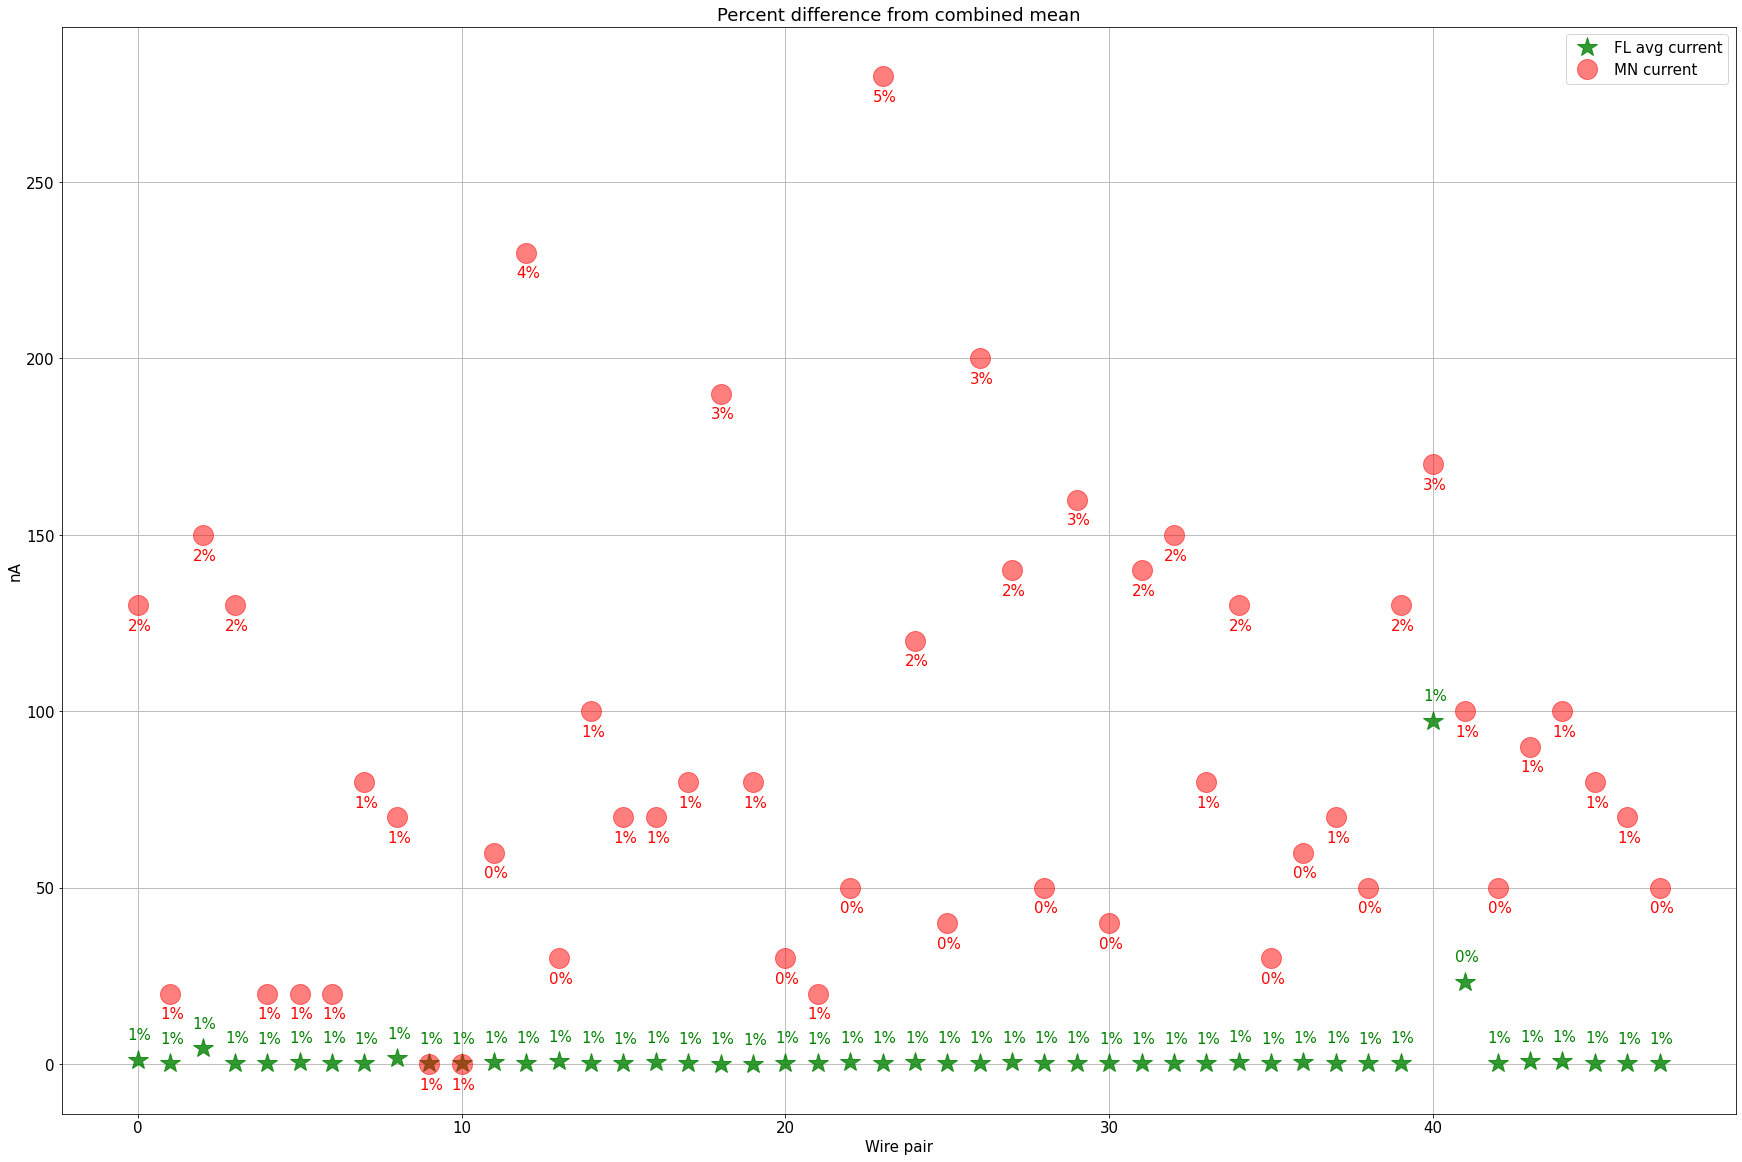

In [3]:
#find percent difference from combined mean
flpdiff = []
mnpdiff = []
for i in range(len(avgs)):
    flpdiff.append((avgs[i] - combinedmean)/combinedmean)
    mnpdiff.append((mncurr2[i] - combinedmean)/combinedmean)
    
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(48), avgs, 'g*', label='FL avg current', markersize=20, alpha=0.8)
plt.plot(range(48), mncurr2, 'ro', label='MN current', markersize=20, alpha=0.5)
plt.xlabel('Wire pair')
plt.ylabel('nA')
plt.title('Percent difference from combined mean')
for a,b in enumerate(avgs):
    ax.annotate(str("{:.0f}".format(abs(flpdiff[a]))+'%'), xy=(a,b), xytext=(-10,20), textcoords='offset points', color='g')
for a,b in enumerate(mncurr2):
    ax.annotate(str("{:.0f}".format(abs(mnpdiff[a]))+'%'), xy=(a,b), xytext=(-10,-25), textcoords='offset points', color='r')
plt.grid()
plt.legend()
plt.savefig('panel138.png')

FL avgs
Number over 0 nA: 48 (100.0%)
Number over 10 nA: 2 (4.2%)
Number over 20 nA: 2 (4.2%)
Number over 30 nA: 1 (2.1%)
Number over 50 nA: 1 (2.1%)
Number over 100 nA: 0 (0.0%)
Number over 150 nA: 0 (0.0%)
MN currents
Number over 0 nA: 46 (95.8%)
Number over 10 nA: 46 (95.8%)
Number over 20 nA: 41 (85.4%)
Number over 30 nA: 38 (79.2%)
Number over 50 nA: 31 (64.6%)
Number over 100 nA: 15 (31.2%)
Number over 150 nA: 6 (12.5%)


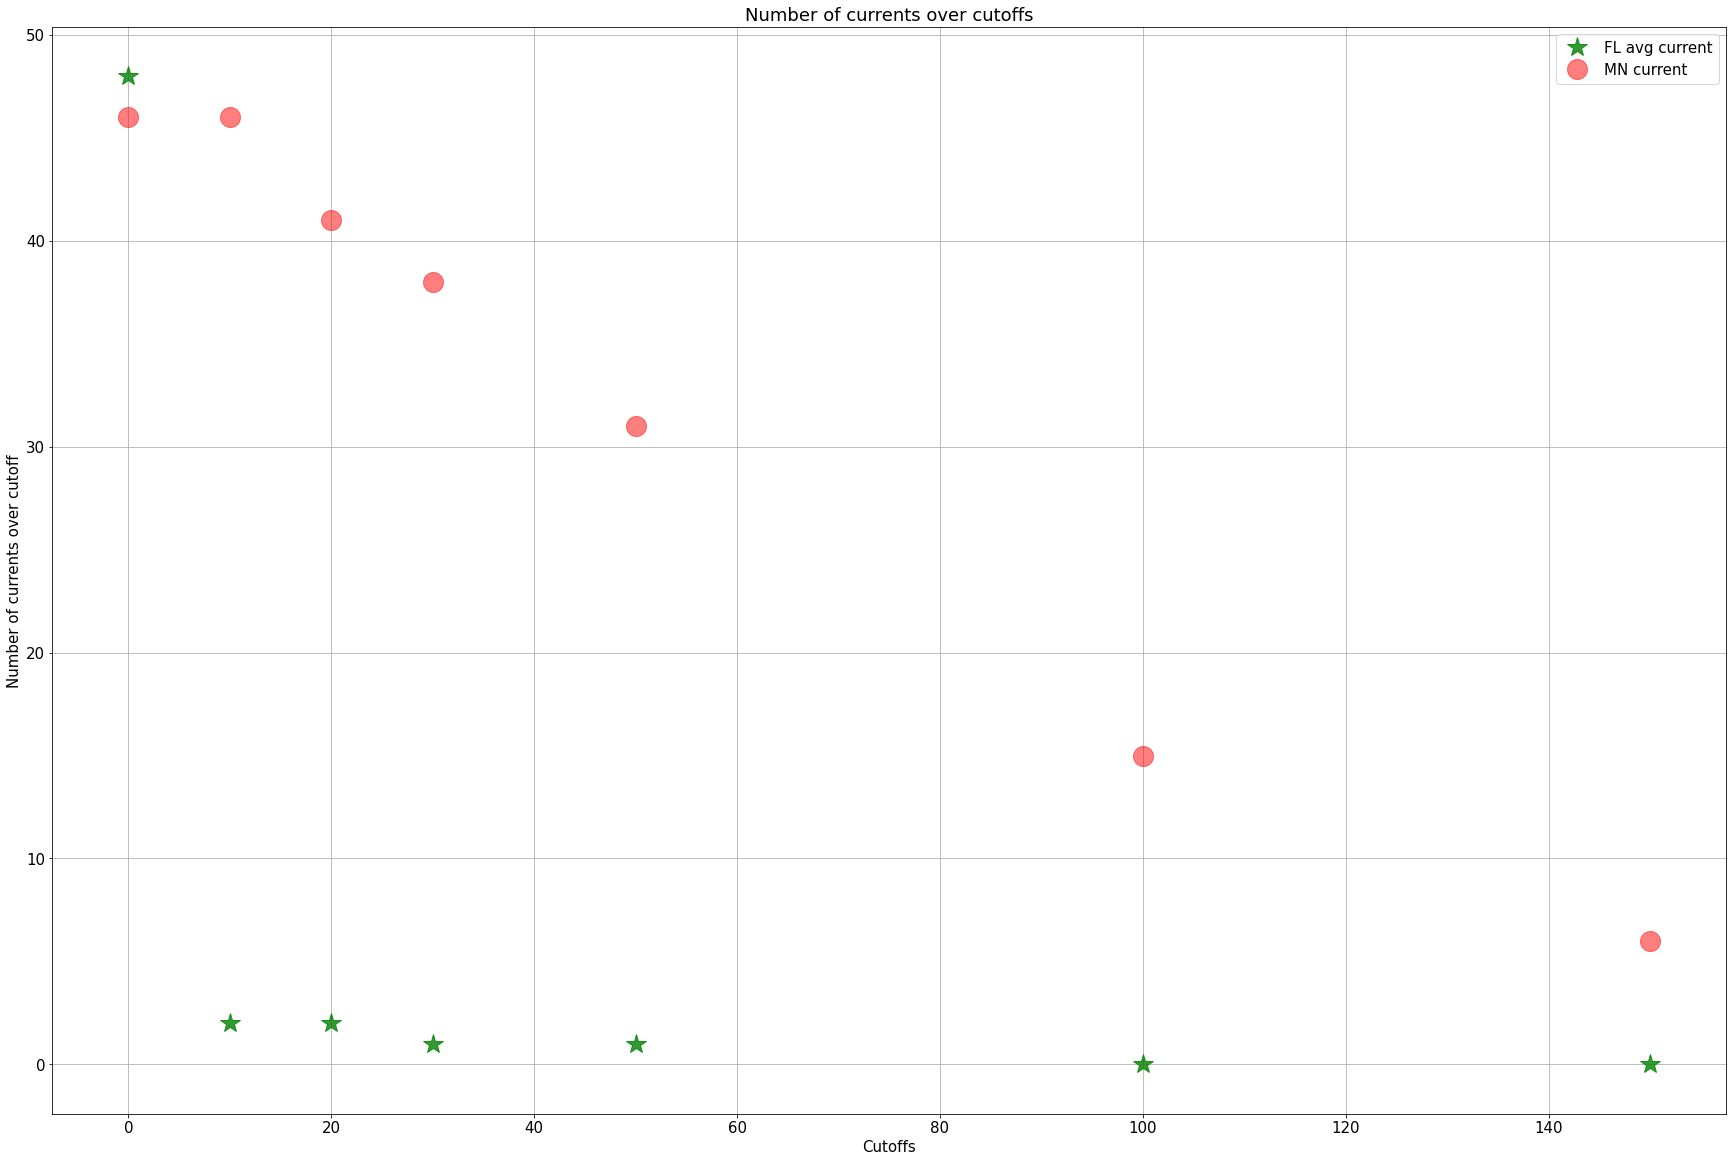

In [4]:
#FL avgs - find how many values are over each cutoff
cutoffsfl = [0,10,20,30,50,100,150]
number_over_cutoff_fl = []

#make the number_over_cutoff list as long as the cutoff list
for i in range(len(cutoffsfl)):
    number_over_cutoff_fl.append(0)

#add to number_over_cutoff if value is over cutoff, for each value
for i in range(len(avgs)):
    for j in range(len(cutoffsfl)):
        if avgs[i] > cutoffsfl[j]:
            number_over_cutoff_fl[j] += 1

print('FL avgs')
for i in range(len(cutoffsfl)):
    print('Number over ' + str(cutoffsfl[i]) + ' nA: ' + str(number_over_cutoff_fl[i]) + ' (' + str("{:.1f}".format(number_over_cutoff_fl[i]/len(avgs)*100)) + '%)')
    
#MN currents - find how many values are over each cutoff
cutoffsmn = [0,10,20,30,50,100,150]
number_over_cutoff_mn = []

#make the number_over_cutoff list as long as the cutoff list
for i in range(len(cutoffsmn)):
    number_over_cutoff_mn.append(0)

#add to number_over_cutoff if value is over cutoff, for each value
for i in range(len(mncurr2)):
    for j in range(len(cutoffsmn)):
        if mncurr2[i] > cutoffsmn[j]:
            number_over_cutoff_mn[j] += 1

print('MN currents')
for i in range(len(cutoffsmn)):
    print('Number over ' + str(cutoffsmn[i]) + ' nA: ' + str(number_over_cutoff_mn[i]) + ' (' + str("{:.1f}".format(number_over_cutoff_mn[i]/len(mncurr2)*100)) + '%)')

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(cutoffsfl, number_over_cutoff_fl, 'g*', label='FL avg current', markersize=20, alpha=0.8)
plt.plot(cutoffsmn, number_over_cutoff_mn, 'ro', label='MN current', markersize=20, alpha=0.5)
plt.xlabel('Cutoffs')
plt.ylabel('Number of currents over cutoff')
plt.title('Number of currents over cutoffs')
plt.grid()
plt.legend()
plt.savefig('cutoff138.png')

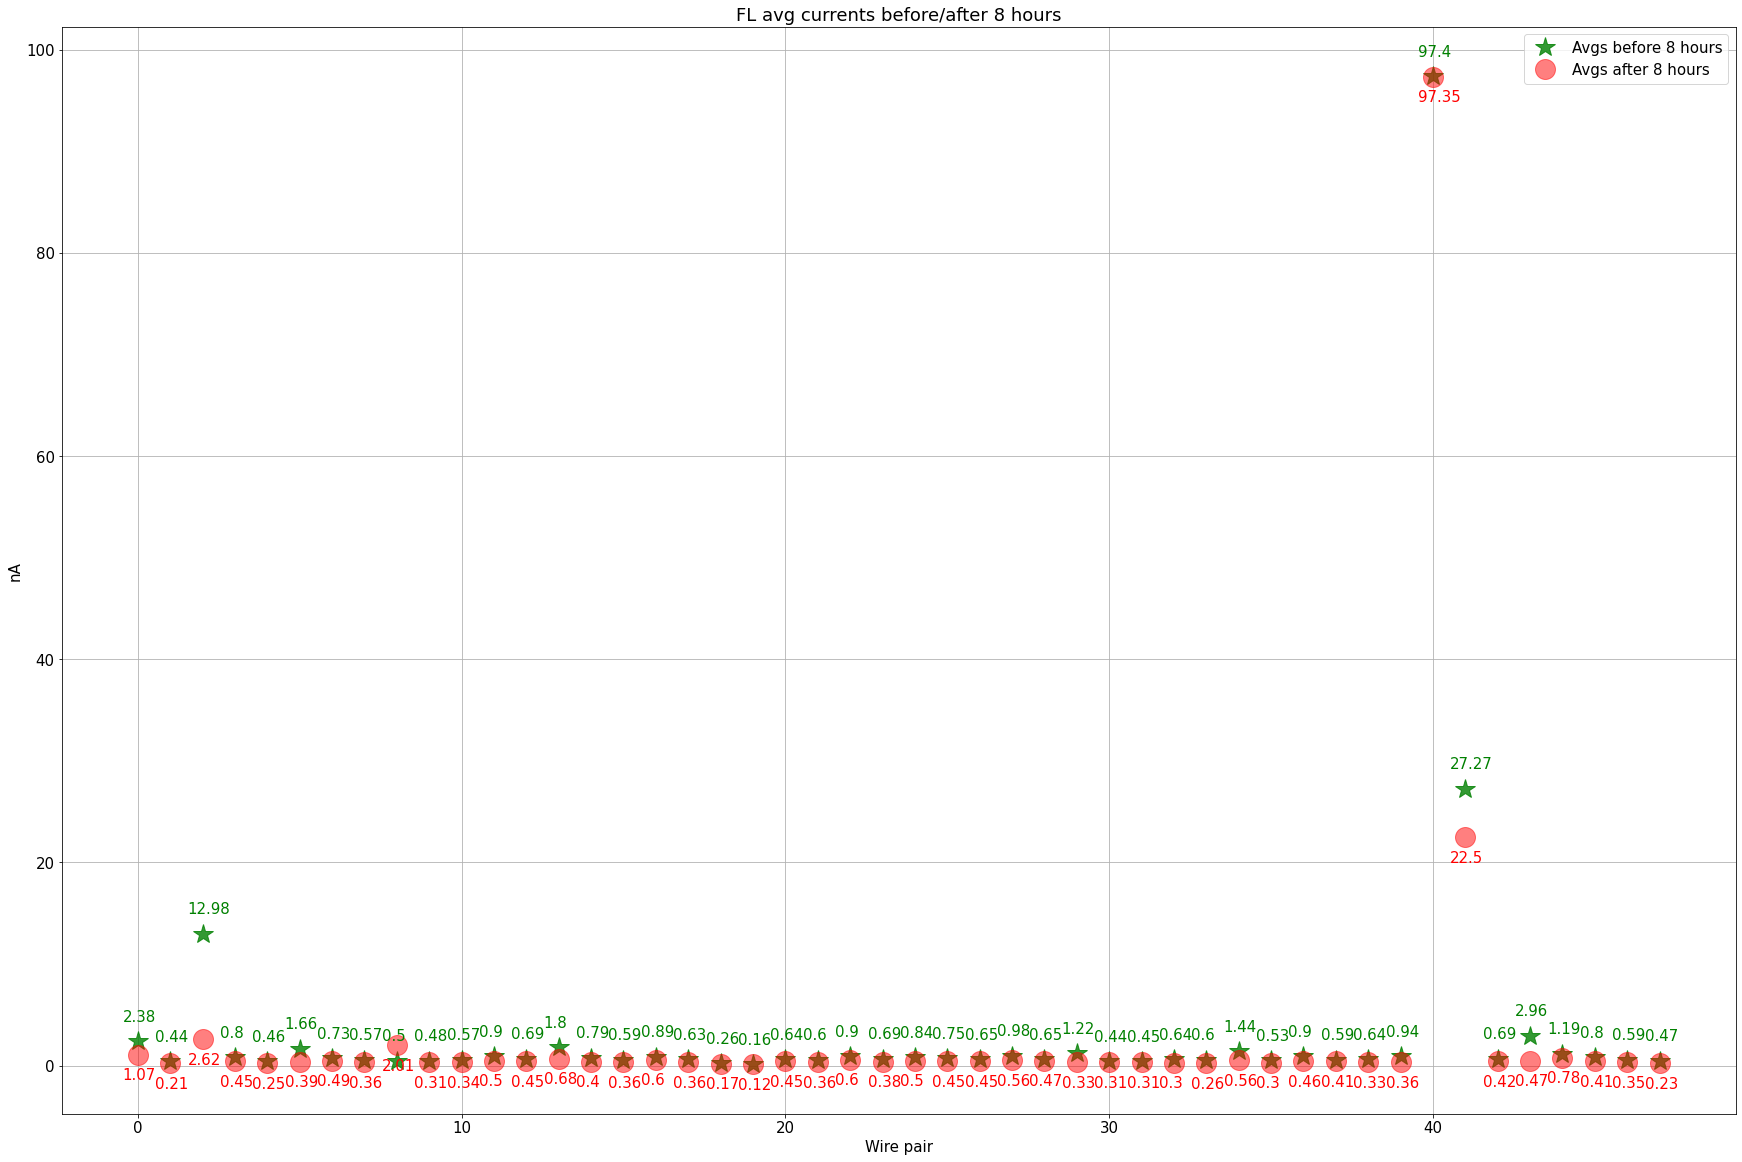

In [5]:
#for those panels that are tested for more than 8 hours, compare the avg currents over the first 8 hours with the avg currents after
#extract avg currents from FL data before and after 8 hours

before8 = []
after8 = []
avgsbefore = []
avgsafter = []

with open(infilefl) as f1:

    lines1 = f1.readlines()
    
    x1 = [float((line.split()[0])[:-1])/3600 for line in lines1] #first column is x var for hv data
    
    #find the 8 hour mark
    for pos, val in enumerate(x1):
        if x1[pos] > 8:
            break
    
    #the number of plots to be made is the number of columns minus 1 because the first column is the x var
    numplots = (len(lines1[0].split())-1)

    for col in range(numplots):

        y1 = [float(line.split()[col+1][:-1]) for line in lines1] #each column is y var
        before8 = y1[:pos]
        after8 = y1[pos:]
        
        avgsbefore.append("{:.2f}".format(sum(before8)/len(before8)-5))
        avgsafter.append("{:.2f}".format(sum(after8)/len(after8)-5))
    
for i in range(len(avgsbefore)):
    avgsbefore[i] = float(avgsbefore[i])
for i in range(len(avgsafter)):
    avgsafter[i] = float(avgsafter[i])
    
#plot avgs before 8 hours vs avgs after
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(48), avgsbefore, 'g*', label='Avgs before 8 hours', markersize=20, alpha=0.8)
plt.plot(range(48), avgsafter, 'ro', label='Avgs after 8 hours', markersize=20, alpha=0.5)
plt.xlabel('Wire pair')
plt.ylabel('nA')
plt.title('FL avg currents before/after 8 hours')
for a,b in enumerate(avgsbefore):
    ax.annotate(str(b), xy=(a,b), xytext=(-15,20), textcoords='offset points', color='g')
for a,b in enumerate(avgsafter):
    ax.annotate(str(b), xy=(a,b), xytext=(-15,-25), textcoords='offset points', color='r')
plt.grid()
plt.legend()
plt.savefig('ba138.png')